# Social factor

导入相关库

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

准备数据

In [3]:
# 数据准备
data = {
    'Year': ['2019-2020', '2022-2023', '2023-2024'],
    'summer': [2213000, 2296600, 2648600],
    'winter': [323000, 357000, 398000],
    'total': [2536000, 2653600, 3046600]
}
df = pd.DataFrame(data)

# 将年份转换为时间序列索引

In [4]:
df['Year'] = pd.to_datetime(df['Year'].str[:4])  # 只取前4位作为年份
df.set_index('Year', inplace=True)

# 夏季数据
summer_data = df['summer']

# 冬季数据
winter_data = df['winter']

SARIMA模型

In [5]:
# 定义 SARIMA 模型参数
# SARIMA(p, d, q)(P, D, Q, s)
# 这里假设季节性周期 s=2（夏季和冬季）
order = (1, 1, 1)  # 非季节性部分 (p, d, q)
seasonal_order = (1, 1, 1, 2)  # 季节性部分 (P, D, Q, s)

# 训练夏季模型
summer_model = SARIMAX(summer_data, order=order, seasonal_order=seasonal_order)
summer_results = summer_model.fit(disp=False)

# 训练冬季模型
winter_model = SARIMAX(winter_data, order=order, seasonal_order=seasonal_order)
winter_results = winter_model.fit(disp=False)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except fo

In [6]:
# 预测未来 2 年
future_years = 2
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=future_years, freq='YS')

# 夏季预测
summer_forecast = summer_results.get_forecast(steps=future_years)
summer_pred = summer_forecast.predicted_mean

# 冬季预测
winter_forecast = winter_results.get_forecast(steps=future_years)
winter_pred = winter_forecast.predicted_mean

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


可视化

Summer Forecast Results:
3    2732200.0
4    3084200.0
Name: predicted_mean, dtype: float64

Winter Forecast Results:
3    432000.0
4    473000.0
Name: predicted_mean, dtype: float64
夏季预测函数：
                                     SARIMAX Results                                     
Dep. Variable:                            summer   No. Observations:                    3
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood                   0.000
Date:                           Sat, 25 Jan 2025   AIC                             10.000
Time:                                   11:43:11   BIC                               -inf
Sample:                                        0   HQIC                               nan
                                             - 3                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: divide by zero encountered i

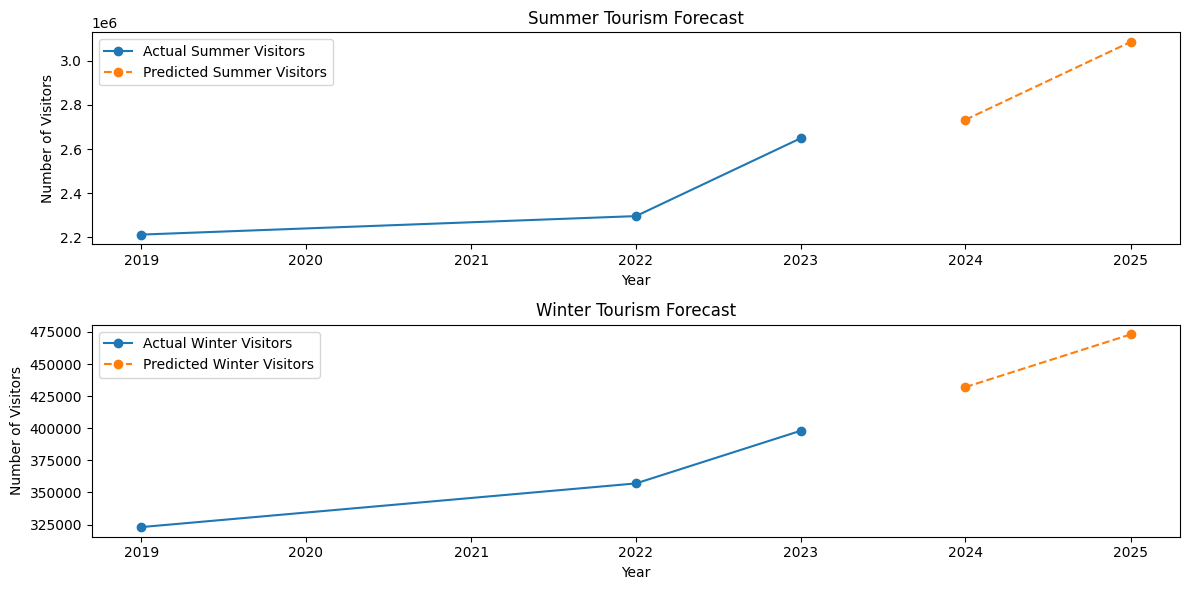

In [8]:
# 打印预测结果
print("Summer Forecast Results:")
print(summer_pred)

print("\nWinter Forecast Results:")
print(winter_pred)

# 输出预测的函数表达式
print('夏季预测函数：')
print(summer_results.summary())
print('冬季预测函数：')
print(winter_results.summary())

# 可视化结果
plt.figure(figsize=(12, 6))

# 夏季数据
plt.subplot(2, 1, 1)
plt.plot(summer_data.index, summer_data, label='Actual Summer Visitors', marker='o')
plt.plot(forecast_index, summer_pred, label='Predicted Summer Visitors', marker='o', linestyle='--')
plt.title('Summer Tourism Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.legend()

# 冬季数据
plt.subplot(2, 1, 2)
plt.plot(winter_data.index, winter_data, label='Actual Winter Visitors', marker='o')
plt.plot(forecast_index, winter_pred, label='Predicted Winter Visitors', marker='o', linestyle='--')
plt.title('Winter Tourism Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')
plt.legend()

plt.tight_layout()
plt.show()